## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from neural_networks import NeuralNetwork as NN


### Importing dataset

In [2]:
raw_df = pd.read_csv('./Dataset/Dengue.csv')
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,...,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,normal
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,...,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,normal
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,...,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,normal
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,...,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,normal
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,...,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,normal


### performing initial checks on dataset

In [3]:
pd.options.display.max_columns=None

In [4]:
raw_df.describe(include='all')

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.0,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602
mean,300.500000,31.918079,24.588318,27.813181,38.476069,25.613154,31.485111,23.984349,81.254786,13.120862,69.625588,9.034032,0.0,0.0,17.599554,191.498693,1004.690531,59.701192,3.632620,199.802695,17.251785,6.877674,1.827725,0.859734,8502.342193,NaN
std,173.926709,2.737215,2.727919,2.412416,4.776400,4.178797,4.672951,2.668014,9.406354,28.463365,45.539264,14.201016,0.0,0.0,8.980189,81.604668,41.364967,20.832639,1.890352,54.128192,4.676051,1.763928,1.237389,0.973575,6780.749627,NaN
min,0.000000,25.000000,12.740000,18.820000,25.000000,12.360000,18.626667,4.480000,40.833333,0.000000,0.000000,0.000000,0.0,0.0,3.600000,0.500000,0.000000,0.000000,0.800000,57.900000,5.000000,2.000000,0.000000,0.000000,52.000000,NaN
25%,150.250000,30.025000,23.200000,26.500000,35.600000,23.200000,28.100000,23.300000,75.800000,0.000000,0.000000,0.000000,0.0,0.0,11.200000,134.425000,1002.025000,47.400000,2.523780,160.350000,13.900000,6.000000,1.000000,0.000000,3017.750000,NaN
50%,300.500000,31.700000,25.000000,27.900000,38.400000,25.000000,31.500000,24.529268,82.800000,3.000000,100.000000,4.170000,0.0,0.0,15.589178,207.300000,1007.000000,63.700000,3.200000,205.750000,17.750000,7.000000,2.000000,1.000000,7490.000000,NaN
75%,450.750000,33.600000,26.500000,29.448171,41.900000,26.600000,34.875000,25.475000,88.175000,12.589000,100.000000,9.705508,0.0,0.0,22.775000,252.375000,1010.185772,73.200000,4.300000,238.800610,20.600610,8.000000,3.000000,1.000000,12702.500000,NaN


In [5]:
raw_df['cases'].describe()

count      602.000000
mean      8502.342193
std       6780.749627
min         52.000000
25%       3017.750000
50%       7490.000000
75%      12702.500000
max      24983.000000
Name: cases, dtype: float64

In [6]:
#Updating labels column: might be useful in future to test classification problem
raw_df['labels'] = pd.cut(
    raw_df['cases'],
    bins=[-float('inf'), 2500, 5000, 7500, float('inf')],
    labels=[0, 1, 2, 3]
).astype(int)


In [7]:
raw_df.head()

,serial,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,stations,cases,labels
0,0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,0.0,0.0,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904,1.197260,4925.0,1
1,1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,0.0,0.0,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537,0.991870,5077.0,2
2,2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,0.0,0.0,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569,1.170732,7579.0,3
3,3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,0.0,0.0,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813,0.146341,13706.0,3
4,4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,0.0,0.0,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480,3.951220,82.0,0


### Preparing the input data to neural network

In [8]:
df = raw_df.copy()

In [9]:
df.drop(columns=['serial', 'cases', 'labels', 'stations', 'snow', 'snowdepth'], inplace=True)

In [10]:
df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions
0,34.053151,24.478082,28.709863,39.757808,25.317808,32.306301,22.971233,73.508219,2.921726,44.657534,4.360932,15.678356,175.595342,1007.911781,50.747945,3.789863,208.097808,17.973699,7.232877,2.558904
1,34.086179,25.694309,29.464228,41.338211,28.140650,34.423577,23.484553,72.066667,3.783415,39.837398,2.676748,14.574797,158.349593,1003.533333,48.313821,2.884553,222.926016,19.246341,7.504065,1.658537
2,34.573984,25.417886,29.526829,40.464228,26.560163,33.085366,22.580488,69.424390,3.065854,33.333333,2.337805,14.978049,202.621138,1005.731707,55.621138,4.242276,229.413008,19.802439,7.829268,1.910569
3,33.020325,25.080488,28.727642,37.878049,26.193496,31.772358,21.752033,69.297561,6.025203,37.398374,2.676667,16.504878,183.544715,1003.359350,50.208130,2.991057,225.421951,19.480488,7.593496,1.300813
4,30.660976,24.230894,26.774797,36.586992,24.263415,28.943902,24.214634,86.652033,23.336585,96.747967,15.616992,19.546341,224.030081,1009.995935,45.542276,3.886992,176.598374,15.261789,6.186992,0.967480


In [11]:
raw_df['labels'].nunique()

4

In [12]:
X = np.array(df)
Y_linear = np.array(raw_df['cases']).reshape(X.shape[0], 1)
Y_classification = np.array(raw_df['labels']).reshape(X.shape[0], 1)



In [13]:
print(X.shape)
print(Y_linear.shape)
print(Y_classification.shape)

(602, 20)
(602, 1)
(602, 1)


#### Normalizing inputs

In [14]:
X_mean = np.mean(X,  axis=0, keepdims=True)
X_dev = np.std(X, axis=0, keepdims=True)

In [15]:
X_normalized = (X-X_mean)/X_dev
X_normalized[:5,:]

array([[ 0.7806648 , -0.04044378,  0.37200389,  0.26857153, -0.0707361 ,
         0.17587884, -0.38004258, -0.82423103, -0.35862302, -0.54873124,
        -0.32934167, -0.2141153 , -0.19504492,  0.07793863, -0.43012758,
         0.08325109,  0.15337685,  0.15451366,  0.20153778,  0.59139581],
       [ 0.79274117,  0.40577122,  0.68496485,  0.59972417,  0.60534117,
         0.62934745, -0.18748484, -0.97761154, -0.32832424, -0.65466498,
        -0.44803629, -0.33710572, -0.40655353, -0.02799856, -0.5470666 ,
        -0.39605802,  0.42755078,  0.42690184,  0.35540677, -0.13684406],
       [ 0.97110151,  0.30435594,  0.71093619,  0.41659241,  0.22681067,
         0.34273536, -0.52661975, -1.2587485 , -0.35355519, -0.79760699,
        -0.47192366, -0.29216375,  0.13641003,  0.02519143, -0.196012  ,
         0.32277769,  0.54749542,  0.54592534,  0.53992318,  0.06700618],
       [ 0.40302385,  0.18056963,  0.37937992, -0.12530726,  0.13899315,
         0.06152119, -0.83739177, -1.27224307, -

#### Spliting dataset into train  dev and test sets

In [16]:
X_train, X_test, Y_c_train, Y_c_test, Y_l_train, Y_l_test = train_test_split(X_normalized, Y_classification, Y_linear, test_size=0.3, random_state=42)

In [17]:
X_dev_, X_test, Y_c_dev, Y_c_test, Y_l_dev, Y_l_test = train_test_split(X_test, Y_c_test, Y_l_test, test_size=0.5, random_state=42)

In [18]:
print(X_train.shape)
print(X_dev_.shape)
print(X_test.shape)


(421, 20)
(90, 20)
(91, 20)


#### Transposing the matrices so that each matrix column contains a single training example

In [19]:
X_train = X_train.T
X_development = X_dev_.T
X_test = X_test.T

In [20]:
Y_c_train = Y_c_train.T
Y_c_dev = Y_c_dev.T
Y_c_test = Y_c_test.T

In [21]:
Y_l_train = Y_l_train.T
Y_l_dev = Y_l_dev.T
Y_l_test = Y_l_test.T

In [22]:
Y_l_dev.shape

(1, 90)

#### Scaling down our output

In [23]:
Y_l_train_ = np.power(Y_l_train, 0.02)
Y = np.arange(len(Y_l_train))
print(Y.shape)
print(Y_l_train.shape)
# plt.scatter(Y, Y_l_train_)
# Y_l_dev[0]


(1,)
(1, 421)


### Training a model to predict scaled down output

In [24]:
linear_model = NN(input_size=X_train.shape[0], output_size=1,architecture=[2,2,1], loss="MSE")


In [25]:
Y_l_dev_ = np.power(Y_l_dev, 0.02)
Y_l_dev_.shape

(1, 90)

In [26]:
def model_train(model, num_epochs=10000, learning_rate=0.1, eval_interval=1000,):
    # Training loop
    train_losses = []
    dev_losses = []
    for epoch in range(num_epochs):
        train_loss = model.model_train(X_train, Y_l_train_, learning_rate=learning_rate)
        train_losses.append(train_loss[0])
        
        # Optionally evaluate on dev set
        if epoch % eval_interval == 0:
            dev_loss, pred = model.evaluate(X_development, Y_l_dev_)
            dev_losses.append(dev_loss[0])
            print(f"Epoch {epoch}: Train Loss = {train_loss}, Dev Loss = {dev_loss}")

    return train_losses, dev_losses


In [27]:
X_train.shape

(20, 421)

In [28]:
train_loss, dev_loss = model_train(model=linear_model, learning_rate=0.05, num_epochs=15000)

Epoch 0: Train Loss = [0.65217842], Dev Loss = [0.65794108]
Epoch 1000: Train Loss = [0.07324944], Dev Loss = [0.0817952]
Epoch 2000: Train Loss = [0.06069793], Dev Loss = [0.06846715]
Epoch 3000: Train Loss = [0.05499451], Dev Loss = [0.06259677]
Epoch 4000: Train Loss = [0.05149704], Dev Loss = [0.05910053]
Epoch 5000: Train Loss = [0.04907468], Dev Loss = [0.05665452]
Epoch 6000: Train Loss = [0.04727882], Dev Loss = [0.0548051]
Epoch 7000: Train Loss = [0.04588284], Dev Loss = [0.05332921]
Epoch 8000: Train Loss = [0.04475942], Dev Loss = [0.05212106]
Epoch 9000: Train Loss = [0.04383178], Dev Loss = [0.05109577]
Epoch 10000: Train Loss = [0.04303546], Dev Loss = [0.05020341]
Epoch 11000: Train Loss = [0.04234191], Dev Loss = [0.049424]
Epoch 12000: Train Loss = [0.04173132], Dev Loss = [0.04872865]
Epoch 13000: Train Loss = [0.0411846], Dev Loss = [0.04809817]
Epoch 14000: Train Loss = [0.04068758], Dev Loss = [0.0475253]


15

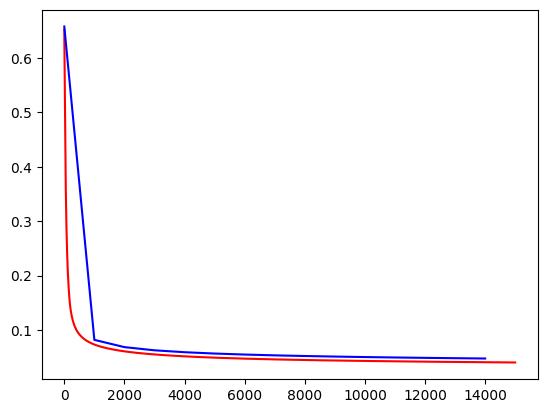

In [29]:
plt.plot(train_loss, c='r')
plt.plot(range(1,15001, 1000), dev_loss, c='b')
len(dev_loss)

In [30]:
loss, pred = linear_model.evaluate(X_test, np.power(Y_l_test,0.02))

In [31]:
accuracy = (1-loss)*100
accuracy

array([96.08495999])

In [32]:
pred

array([[1.26937787, 1.00272393, 1.29901031, 1.01921524, 1.27837895,
        1.27978251, 0.70839171, 0.73750139, 0.72426269, 0.76275024,
        1.26839673, 1.27846916, 1.21710793, 1.27299125, 1.26343248,
        1.28046372, 0.94012128, 1.19043733, 1.29316702, 1.16386283,
        1.25066554, 1.2752883 , 1.27523576, 0.85935615, 1.26923018,
        0.73034159, 1.10103793, 1.26084819, 1.26524719, 0.70387841,
        1.01738128, 1.28482058, 0.71982176, 0.8210603 , 1.04963576,
        1.01280781, 1.25235324, 1.06073385, 0.73130273, 1.20932862,
        1.26269583, 1.26402456, 1.17668787, 1.27781473, 1.30110134,
        1.27575302, 1.27809613, 1.12671328, 1.28252686, 0.7564506 ,
        0.73729089, 0.8355838 , 1.26961995, 1.09141444, 1.19989697,
        1.2716965 , 1.2651744 , 0.73263193, 0.80587575, 1.26010907,
        1.29214335, 1.5696882 , 1.20585224, 0.84812644, 1.26264901,
        1.25142575, 0.73225943, 1.23546827, 0.74049952, 1.07051403,
        1.29252067, 1.26857334, 1.27076314, 0.72

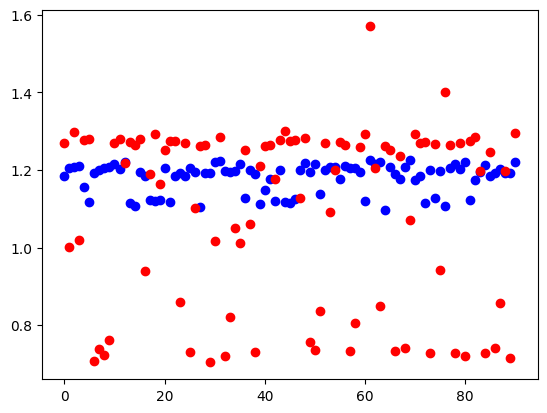

In [37]:
# plt.scatter(Y_l_test.shape[1],  )
# data = Y_l_test.flatten()
data = np.power(Y_l_test,0.02).flatten()

plt.scatter(range(len(data)), data, c="b")  # Scatter plot
plt.scatter(range(len(data)), pred.flatten(), c="r")


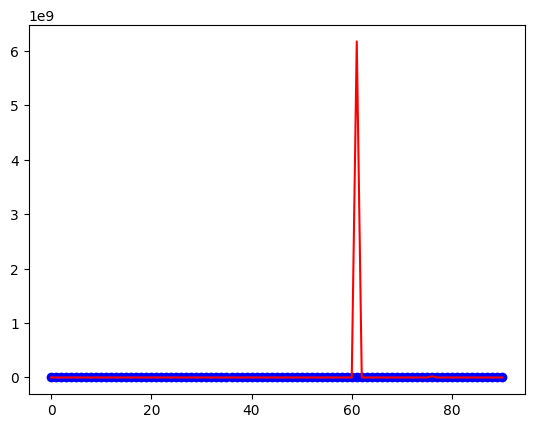

In [34]:
# plt.scatter(Y_l_test.shape[1],  )
# data = np.power(Y_l_test,0.002).flatten()
# pred_ = np.power(pred,500).flatten()


plt.scatter(range(len(data)), Y_l_test.flatten(), c="b")  # Scatter plot
plt.plot(range(len(data)), np.power(pred, 1/0.02).flatten(), c="r")

In [35]:
for i in linear_model.grads:
    print(i)
    print(linear_model.grads[i])

dW3
[[0.01157143 0.01181486]]
db3
[[-0.08708712]]
dW2
[[-1.55558861e-02 -3.34016676e-05]
 [-1.30271621e-02 -1.21665694e-02]]
db2
[[0.05548245]
 [0.01274531]]
dW1
[[ 0.01236688  0.00827261  0.01267105  0.01362686  0.00792176  0.01523375
   0.00301017 -0.01092557 -0.0097491  -0.00668456 -0.00648885  0.0075241
   0.01409626  0.00026371 -0.01231137 -0.00485491  0.01489811  0.01479172
   0.01307703 -0.00883259]
 [-0.00525284 -0.00302202 -0.00475138 -0.00440944 -0.00387276 -0.00449085
  -0.00095592  0.00411618  0.00119441  0.00262556  0.00146673 -0.00284571
  -0.00294512 -0.00041309  0.0022241  -0.00020344  0.00253841  0.00254393
   0.00208987  0.00423385]]
db1
[[ 0.02749562]
 [-0.00378463]]


In [36]:
for i in linear_model.parameters:
    print(i)
    print(linear_model.parameters[i])

W1
[[-0.05706859  0.28385742 -0.20095307  0.22781889  0.22597293  0.12760058
   0.1786389  -0.80960367 -0.07802731 -0.10939635 -0.06003821 -0.08791612
   0.39847636 -0.37007349  0.14450193  0.17828241  0.11118636 -0.28023119
   0.41548746 -0.03777555]
 [-0.17264368  0.06611531  0.09122283  0.42674416  0.00953873  0.19060455
   0.34595213 -0.12688276 -0.1903866  -0.27194218 -0.2691623   0.03447955
   0.57831185  0.13077122  0.36320874  0.78993083 -0.32709155 -0.76195102
   0.33848131  0.22817368]]
b1
[[-0.12792658]
 [ 0.02261424]]
W2
[[-0.50493425 -0.17704755]
 [-0.86887389  0.58234059]]
b2
[[0.25140641]
 [0.09439082]]
W3
[[1.88475886 0.46017673]]
b3
[[0.74307374]]
